In [21]:
import pandas as pd
import os

%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [22]:
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [23]:
pd.options.display.float_format = '{:0,.0f}'.format

In [24]:
# Relative path between notebooks and goruped output directories
relative_path = '../../../outputs/grouped'

In [25]:
tod_dict = {
    '5to6': 'AM',
    '6to7': 'AM',
    '7to8': 'AM',
    '8to9': 'AM',
    '9to10': 'Mid-Day',
    '10to14': 'Mid-Day',
    '14to15': 'Mid-Day',
    '15to16': 'PM',
    '16to17': 'PM',
    '17to18': 'PM',
    '18to20': 'Evening',
    '20to5': 'Night'
}

## Vehicle Miles Traveled (VMT)

In [26]:
df = pd.read_csv(os.path.join(relative_path,'net_summary.csv'))
df['time_period'] = df['tod'].apply(lambda row: tod_dict[row])

# VMT by Facility Type
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
df_fac = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='vmt'].groupby('facility_type').sum()['value'] for i in df_dict.keys()).T
df_fac.columns=[i for i in df_dict.keys()]
df_fac.loc['Total'] = df_fac.sum()

# VMT by Time of Day        
df_tod = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='vmt'].groupby('time_period').sum()['value'] for i in df_dict.keys()).T
df_tod.columns=[i for i in df_dict.keys()]
df_tod.loc['Total'] = df_tod.sum()
display(df_fac)
display(df_tod)

,soundcast_2040_tod,soundcast_2040_constrained
facility_type,,
arterial,"42,140,918","42,634,311"
connectors,"6,206,106","6,104,264"
highway,"47,911,434","48,679,482"
Total,"96,258,458","97,418,056"


,soundcast_2040_tod,soundcast_2040_constrained
time_period,,
AM,"22,340,130","22,576,276"
Evening,"12,043,521","12,126,350"
Mid-Day,"32,407,249","32,966,698"
Night,"6,992,915","7,100,011"
PM,"22,474,644","22,648,722"
Total,"96,258,458","97,418,056"


## Vehicle Hours Traveled (VHT)

In [27]:
df = pd.read_csv(os.path.join(relative_path,'net_summary.csv'))
df['time_period'] = df['tod'].apply(lambda row: tod_dict[row])

# VMT by Facility Type
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
df_fac = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='vht'].groupby('facility_type').sum()['value'] for i in df_dict.keys()).T
df_fac.columns=[i for i in df_dict.keys()]
df_fac.loc['Total'] = df_fac.sum()

# VMT by Time of Day        
df_tod = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='vht'].groupby('time_period').sum()['value'] for i in df_dict.keys()).T
df_tod.columns=[i for i in df_dict.keys()]
df_tod.loc['Total'] = df_tod.sum()
display(df_fac)
display(df_tod)

,soundcast_2040_tod,soundcast_2040_constrained
facility_type,,
arterial,"1,488,363","1,500,764"
connectors,"393,002","386,212"
highway,"1,182,641","1,213,713"
Total,"3,064,006","3,100,689"


,soundcast_2040_tod,soundcast_2040_constrained
time_period,,
AM,"728,453","738,814"
Evening,"400,881","402,142"
Mid-Day,"964,089","979,734"
Night,"180,483","181,141"
PM,"790,099","798,858"
Total,"3,064,006","3,100,689"


## Delay

In [28]:
df = pd.read_csv(os.path.join(relative_path,'net_summary.csv'))
df['time_period'] = df['tod'].apply(lambda row: tod_dict[row])

# VMT by Facility Type
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
df_fac = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='delay'].groupby('facility_type').sum()['value'] for i in df_dict.keys()).T
df_fac.columns=[i for i in df_dict.keys()]
df_fac.loc['Total'] = df_fac.sum()
df_fac = df_fac.drop('connectors', axis=0)

# VMT by Time of Day        
df_tod = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='delay'].groupby('time_period').sum()['value'] for i in df_dict.keys()).T
df_tod.columns=[i for i in df_dict.keys()]
df_tod.loc['Total'] = df_tod.sum()
display(df_fac)
display(df_tod)

,soundcast_2040_tod,soundcast_2040_constrained
facility_type,,
arterial,"326,183","330,199"
highway,"341,016","359,227"
Total,"667,199","689,426"


,soundcast_2040_tod,soundcast_2040_constrained
time_period,,
AM,"192,342","198,635"
Evening,"83,983","86,132"
Mid-Day,"155,426","162,069"
Night,"12,627","12,506"
PM,"222,821","230,083"
Total,"667,199","689,426"


## VMT per Person
From Daysim records

In [29]:
pd.options.display.float_format = '{:0,.2f}'.format

df = pd.read_csv(os.path.join(relative_path,'agg_measures.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
_df = df[df['description'] == 'VMT per Person'][['source','value']]
#_df.index =['','']    # hide index
display(_df)

,source,value
0,soundcast_2040_tod,14.40
2,soundcast_2040_constrained,14.62
4,survey,17.44


## Trips per Person

In [30]:
_df = df[df['description'] == 'Average Trips per Person'][['source','value']].reset_index(drop=True)
_df.index = ["" for i in xrange(len(_df))]    # hide index
display(_df)

,source,value
,soundcast_2040_tod,3.97
,soundcast_2040_constrained,3.90
,survey,4.54


## Average Trip Length

In [31]:
df = pd.read_csv(os.path.join(relative_path,'trips.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]

In [32]:
dfplot = pd.DataFrame([(df_dict[i]['travdist']*df_dict[i]['trexpfac']).sum()/df_dict[i]['trexpfac'].sum() for i in df_dict.keys()])
dfplot.columns = ['value']
dfplot['source'] = [i for i in df_dict.keys()]
dfplot.index = ["" for i in xrange(len(dfplot))]    # hide index
display(dfplot[['source','value']])

,source,value
,soundcast_2040_tod,5.21
,survey,5.87
,soundcast_2040_constrained,5.39


## Trip Mode Share

,soundcast_2040_tod,survey,soundcast_2040_constrained
Bike,3.0%,1.4%,2.1%
HOV2,22.0%,22.2%,21.3%
HOV3+,14.8%,16.0%,14.4%
SOV,38.7%,40.6%,37.4%
School Bus,2.0%,2.2%,2.1%
Transit,5.0%,4.4%,4.6%
Walk,14.5%,12.7%,18.2%


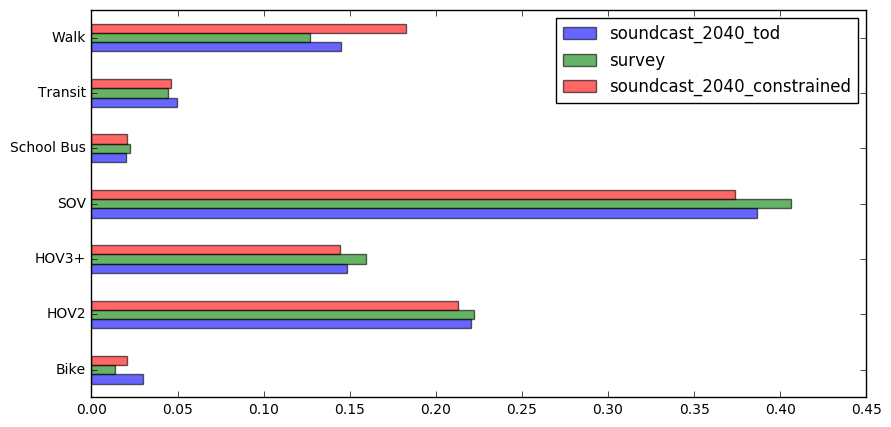

In [33]:
pd.options.display.float_format = '{:,.1%}'.format
dfplot = pd.DataFrame([df_dict[i].groupby('mode').sum()['trexpfac']/df_dict[i].sum()['trexpfac'] for i in df_dict.keys()]).T
dfplot = dfplot.drop('Other', axis=0)
dfplot.columns = df_dict.keys()
dfplot.plot(kind='barh', alpha=0.6, figsize=(10,5))
display(dfplot)